# Uber Data Anapysis Project

## Load the data set and important library

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns



In [923]:
df= pd.read_csv("UberDataset.csv")

## Clean the data set

In [924]:
df.drop_duplicates()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21.11,01-01-2016 21.17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 1.25,01-02-2016 1.37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20.25,01-02-2016 20.38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17.31,01-05-2016 17.45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14.42,01-06-2016 15.49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [925]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [926]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [927]:
df['START_DATE']=df['START_DATE'].apply(
  lambda x:x.replace(".",":")
)

In [928]:
df.replace('Kar?chi', 'Karachi', inplace=True)

In [929]:
df.sample(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
285,3/29/2016 23:04,3/29/2016 23:21,Personal,Orlando,Kissimmee,13.8,NaN
115,2/16/2016 17:17,2/16/2016 17:26,Business,Colombo,Nugegoda,1.1,Meal/Entertain
239,3/18/2016 8:35,3/18/2016 8:43,Business,Midtown,Midtown,1.1,Meal/Entertain
757,09-12-2016 13:04,09-12-2016 13.44,Business,Unknown Location,Unknown Location,11.5,NaN
669,8/17/2016 14:45,8/17/2016 14:50,Business,Unknown Location,R?walpindi,1.4,NaN
159,2/25/2016 16:47,2/25/2016 17:02,Business,Heritage Pines,Whitebridge,3.2,Errand/Supplies
427,06-11-2016 17:34,06-11-2016 17.39,Business,Morrisville,Cary,4.6,Meal/Entertain
333,4/27/2016 14:13,4/27/2016 14:25,Business,Burtrose,Whitebridge,4.8,Between Offices
314,4/14/2016 7:29,4/14/2016 8:09,Business,Cary,Holly Springs,15.3,Temporary Site
67,02-04-2016 8:40,02-04-2016 9.01,Business,Cary,Morrisville,5.2,Errand/Supplies


In [930]:
df['START_DATE']=df['START_DATE'].apply(
  lambda x:x.replace("/","-")
)

In [931]:
df['START_DATE']=pd.to_datetime(df['START_DATE'])

In [932]:
df.sample(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
61,2016-02-01 10:35:00,02-01-2016 11.15,Business,Cary,Chapel Hill,19.4,Customer Visit
975,2016-11-19 16:01:00,11/19/2016 16:06,Business,Cary,Cary,1.5,NaN
346,2016-05-01 17:54:00,05-01-2016 18.10,Business,Tanglewood,Parkway,7.5,Meeting
241,2016-03-18 19:23:00,3/18/2016 19:29,Business,Sharpstown,Sharpstown,1.0,Errand/Supplies
265,2016-03-23 14:53:00,3/23/2016 14:59,Personal,Preston,Whitebridge,1.6,NaN
933,2016-11-10 15:17:00,11-10-2016 15.22,Business,San Francisco,Oakland,9.9,Temporary Site
756,2016-09-12 11:15:00,09-12-2016 11.24,Business,Unknown Location,Unknown Location,1.7,NaN
12,2016-01-10 19:12:00,01-10-2016 19.32,Business,Midtown,East Harlem,6.2,Meeting
1103,2016-12-24 07:43:00,12/24/2016 8:04,Business,Lahore,Unknown Location,6.3,Meal/Entertain
495,2016-06-29 11:49:00,6/29/2016 11:51,Business,Whitebridge,Westpark Place,1.6,NaN


In [933]:
df['END_DATE']=df['END_DATE'].apply(
  lambda x:x.replace(".",":")
)

In [934]:
df['END_DATE']=df['END_DATE'].apply(
  lambda x:x.replace("/","-")
)

In [935]:
df['END_DATE']=pd.to_datetime(df['END_DATE'])

In [936]:
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit


In [937]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [938]:
df.tail(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1145,2016-12-30 10:15:00,2016-12-30 10:33:00,Business,Karachi,Karachi,2.8,Errand/Supplies
1146,2016-12-30 11:31:00,2016-12-30 11:56:00,Business,Karachi,Karachi,2.9,Errand/Supplies
1147,2016-12-30 15:41:00,2016-12-30 16:03:00,Business,Karachi,Karachi,4.6,Errand/Supplies
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Karachi,Karachi,4.6,Meeting
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Karachi,Karachi,0.8,Customer Visit
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


## Fix all the column names to lower case?

In [939]:
df.columns = df.columns.str.lower()


In [940]:
df.sample(10)

,start_date,end_date,category,start,stop,miles,purpose
405,2016-06-05 21:53:00,2016-06-05 22:05:00,Business,Cary,Durham,9.9,Meeting
938,2016-11-11 14:20:00,2016-11-11 14:32:00,Business,Palo Alto,Menlo Park,2.5,NaN
1053,2016-12-14 20:24:00,2016-12-14 20:40:00,Business,Morrisville,Cary,3.1,Customer Visit
279,2016-03-28 12:29:00,2016-03-28 12:42:00,Personal,Kissimmee,Orlando,3.6,NaN
464,2016-06-24 14:01:00,2016-06-24 14:20:00,Business,Cary,Morrisville,8.4,Temporary Site
302,2016-04-07 18:20:00,2016-04-07 18:39:00,Business,Cary,Morrisville,6.1,Meal/Entertain
694,2016-08-22 15:59:00,2016-08-22 17:16:00,Business,Unknown Location,Unknown Location,19.0,NaN
752,2016-09-10 10:28:00,2016-09-10 10:45:00,Business,Unknown Location,Unknown Location,2.8,NaN
638,2016-08-08 17:02:00,2016-08-08 17:13:00,Business,Edgehill Farms,Whitebridge,2.7,Customer Visit
1012,2016-12-01 20:36:00,2016-12-01 20:46:00,Business,Morrisville,Cary,2.9,Customer Visit


In [941]:
df.head(10)

,start_date,end_date,category,start,stop,miles,purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit


## How many total trips were made?

In [942]:
df.head(10)

,start_date,end_date,category,start,stop,miles,purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit


In [943]:
df.shape

(1155, 7)

## What is the average trip distance (in miles)?

In [944]:
df['miles'].mean().round(3)

10.567

## Which city pairs (START ➝ STOP) are the most frequent routes?

In [945]:
df['route'] = df['start'] + " ➝ " + df['stop']


In [946]:
df['route'].value_counts().head(10)

route
Unknown Location ➝ Unknown Location    86
Morrisville ➝ Cary                     75
Cary ➝ Morrisville                     67
Cary ➝ Cary                            53
Cary ➝ Durham                          36
Durham ➝ Cary                          32
Unknown Location ➝ Islamabad           28
Islamabad ➝ Unknown Location           28
Lahore ➝ Lahore                        27
Islamabad ➝ Islamabad                  25
Name: count, dtype: int64

In [947]:
df = df[(df.start!= 'Unknown Location') & (df.stop!= 'Unknown Location')]


In [948]:
df['route'].value_counts().head(1)

route
Morrisville ➝ Cary    75
Name: count, dtype: int64

## What is the most common trip purpose? (excluding missing/NaN values)

In [949]:
df.tail(5)

,start_date,end_date,category,start,stop,miles,purpose,route
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Karachi,Karachi,4.6,Meeting,Karachi ➝ Karachi
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Karachi,Karachi,0.8,Customer Visit,Karachi ➝ Karachi
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,Karachi ➝ Karachi
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Katunayake ➝ Gampaha
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,Gampaha ➝ Ilukwatta


In [950]:
df.isnull().sum()

start_date      0
end_date        0
category        0
start           0
stop            0
miles           0
purpose       372
route           0
dtype: int64

In [951]:
df[df['purpose'].notna()]['purpose'].value_counts()

purpose
Meeting            164
Meal/Entertain     148
Errand/Supplies    111
Customer Visit      92
Temporary Site      32
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Airport/Travel       1
Name: count, dtype: int64

In [952]:
df['purpose'].dropna().value_counts().head(1)

##used this method also  or another method to remove NaN value from the column and show the counts

purpose
Meeting    164
Name: count, dtype: int64

## How many trips were made each month? Which month had the most trips?

In [953]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,route
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce ➝ Fort Pierce
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce ➝ Fort Pierce
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce ➝ Fort Pierce
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce ➝ Fort Pierce
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce ➝ West Palm Beach


In [954]:
df['month'] =df['start_date'].dt.month_name()

##df['start_date'].dt.month ## will give the month in number 1,2,..etc 

In [955]:
df.sample(10)

,start_date,end_date,category,start,stop,miles,purpose,route,month
1117,2016-12-26 11:29:00,2016-12-26 11:42:00,Business,Lahore,Lahore,3.8,Customer Visit,Lahore ➝ Lahore,December
489,2016-06-28 00:48:00,2016-06-28 01:05:00,Business,Morrisville,Cary,8.2,Customer Visit,Morrisville ➝ Cary,June
418,2016-06-08 14:31:00,2016-06-08 14:37:00,Business,Medical Centre,Tudor City,0.7,Errand/Supplies,Medical Centre ➝ Tudor City,June
510,2016-07-04 00:32:00,2016-07-04 00:47:00,Business,Durham,Cary,9.9,Meeting,Durham ➝ Cary,July
255,2016-03-20 18:34:00,2016-03-20 18:40:00,Personal,Sharpstown,Briar Meadow,1.2,NaN,Sharpstown ➝ Briar Meadow,March
1003,2016-11-26 19:47:00,2016-11-26 19:54:00,Business,Cary,Cary,2.5,Errand/Supplies,Cary ➝ Cary,November
294,2016-04-02 11:01:00,2016-04-02 11:16:00,Personal,Kissimmee,Kissimmee,5.1,NaN,Kissimmee ➝ Kissimmee,April
971,2016-11-18 21:23:00,2016-11-18 21:34:00,Business,Morrisville,Cary,5.2,Meal/Entertain,Morrisville ➝ Cary,November
742,2016-08-30 13:25:00,2016-08-30 13:46:00,Business,Islamabad,Islamabad,4.4,NaN,Islamabad ➝ Islamabad,August
1113,2016-12-25 21:58:00,2016-12-25 22:04:00,Business,Lahore,Lahore,2.3,Meal/Entertain,Lahore ➝ Lahore,December


In [956]:
df['month'].value_counts()

month
November     120
March        113
July         112
June         107
December      90
February      86
October       84
August        65
January       61
April         54
May           49
September      3
Name: count, dtype: int64

## How many trips were made for each CATEGORY (e.g., Business vs Personal)?

In [957]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,route,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce ➝ Fort Pierce,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce ➝ Fort Pierce,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce ➝ Fort Pierce,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce ➝ Fort Pierce,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce ➝ West Palm Beach,January


In [958]:
df['category'].value_counts()


category
Business    871
Personal     73
Name: count, dtype: int64

In [959]:
df.isnull().sum()

start_date      0
end_date        0
category        0
start           0
stop            0
miles           0
purpose       372
route           0
month           0
dtype: int64

## What is the average trip duration? (Use END_DATE - START_DATE)

In [960]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,route,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce ➝ Fort Pierce,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce ➝ Fort Pierce,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce ➝ Fort Pierce,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce ➝ Fort Pierce,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce ➝ West Palm Beach,January


In [961]:
df['duration']=df['start_date']-df['end_date']

In [962]:
df.loc[df['duration'] < pd.Timedelta(0), 'duration'] += pd.Timedelta(days=1)

In [963]:
df['duration'].mean()

Timedelta('0 days 23:35:54.978813559')

## What percentage of trips have missing PURPOSE values?

In [964]:
df['purpose'].isnull().sum()

372

In [965]:
df.isnull().sum()

start_date      0
end_date        0
category        0
start           0
stop            0
miles           0
purpose       372
route           0
month           0
duration        0
dtype: int64

## Which day of the week has the highest number of trips?

In [966]:
df['week name'] = df['start_date'].dt.day_name()

In [967]:
df['week name'].value_counts().head(1)

week name
Friday    174
Name: count, dtype: int64

## What is the total and average distance traveled per PURPOSE type?

In [968]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,route,month,duration,week name
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce ➝ Fort Pierce,January,0 days 23:54:00,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce ➝ Fort Pierce,January,0 days 23:48:00,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce ➝ Fort Pierce,January,0 days 23:47:00,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce ➝ Fort Pierce,January,0 days 23:46:00,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce ➝ West Palm Beach,January,0 days 22:53:00,Wednesday


In [969]:
df.groupby('purpose')['miles'].agg(['sum','mean']).round(2).sort_values(by='sum' ,ascending=False)

,sum,mean
purpose,,
Meeting,2435.2,14.85
Customer Visit,1995.2,21.69
Meal/Entertain,824.3,5.57
Errand/Supplies,430.9,3.88
Temporary Site,328.0,10.25
Between Offices,197.0,10.94
Commute,180.2,180.20
Moving,18.2,4.55
Charity ($),15.1,15.10


## How has the number of trips changed over time (monthly trend)?

In [970]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,route,month,duration,week name
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce ➝ Fort Pierce,January,0 days 23:54:00,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce ➝ Fort Pierce,January,0 days 23:48:00,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce ➝ Fort Pierce,January,0 days 23:47:00,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce ➝ Fort Pierce,January,0 days 23:46:00,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce ➝ West Palm Beach,January,0 days 22:53:00,Wednesday


In [971]:
df['month number']= df['start_date'].dt.month

In [972]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,route,month,duration,week name,month number
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce ➝ Fort Pierce,January,0 days 23:54:00,Friday,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce ➝ Fort Pierce,January,0 days 23:48:00,Saturday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce ➝ Fort Pierce,January,0 days 23:47:00,Saturday,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce ➝ Fort Pierce,January,0 days 23:46:00,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce ➝ West Palm Beach,January,0 days 22:53:00,Wednesday,1


In [973]:
trip= df.groupby('month number')['month number'].count()

In [974]:
trip=pd.DataFrame(trip)
trip

,month number
month number,
1,61
2,86
3,113
4,54
5,49
6,107
7,112
8,65
9,3


In [976]:
trip['prv_month']= trip['month number'].shift(1)


In [977]:
trip.rename(columns={"month number": "current month"}, inplace=True)
trip

,current month,prv_month
month number,,
1,61,NaN
2,86,61.0
3,113,86.0
4,54,113.0
5,49,54.0
6,107,49.0
7,112,107.0
8,65,112.0
9,3,65.0


In [978]:
trip['change']=trip['current month']-trip['prv_month']

In [979]:
trip

,current month,prv_month,change
month number,,,
1,61,NaN,NaN
2,86,61.0,25.0
3,113,86.0,27.0
4,54,113.0,-59.0
5,49,54.0,-5.0
6,107,49.0,58.0
7,112,107.0,5.0
8,65,112.0,-47.0
9,3,65.0,-62.0


<Axes: xlabel='month number'>

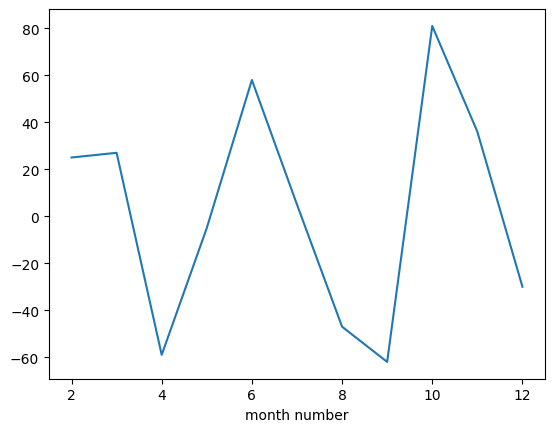

In [980]:
trip['change'].plot()

## Is there a time-of-day pattern in trip frequency (morning, afternoon, night)?

In [981]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,route,month,duration,week name,month number
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce ➝ Fort Pierce,January,0 days 23:54:00,Friday,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce ➝ Fort Pierce,January,0 days 23:48:00,Saturday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce ➝ Fort Pierce,January,0 days 23:47:00,Saturday,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce ➝ Fort Pierce,January,0 days 23:46:00,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce ➝ West Palm Beach,January,0 days 22:53:00,Wednesday,1


In [982]:
df['hours']=df['start_date'].dt.hour

In [983]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,route,month,duration,week name,month number,hours
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce ➝ Fort Pierce,January,0 days 23:54:00,Friday,1,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce ➝ Fort Pierce,January,0 days 23:48:00,Saturday,1,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce ➝ Fort Pierce,January,0 days 23:47:00,Saturday,1,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce ➝ Fort Pierce,January,0 days 23:46:00,Tuesday,1,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce ➝ West Palm Beach,January,0 days 22:53:00,Wednesday,1,14


In [984]:
def cal_hour(hour):
    
    if hour > 5 and hour < 12:
      return "Morning"
    elif hour >= 12 and  hour < 17:
      return "Afternoon"
    elif hour >= 17 and hour <21:
      return "Evening"
    else :
      return "Night"

In [985]:
df['time of day']=df['hours'].apply(cal_hour)

In [986]:
df['time of day'].value_counts()

time of day
Afternoon    367
Evening      266
Morning      181
Night        130
Name: count, dtype: int64

## Which hours of the day are most active for trips?

<Axes: xlabel='hours', ylabel='Count'>

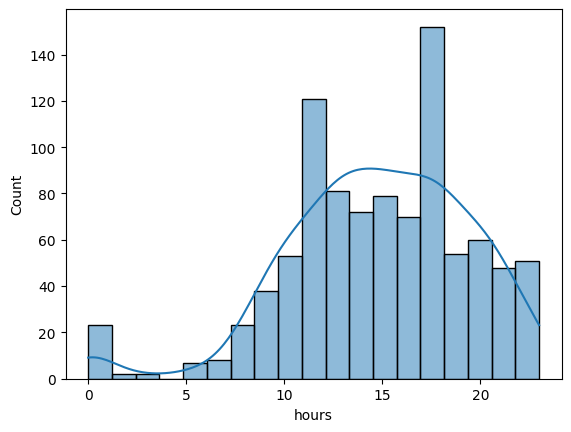

In [987]:
sns.histplot(x=df['hours'],kde=True)

## What is the average distance of trips for each PURPOSE and how do they compare?

In [988]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,route,month,duration,week name,month number,hours,time of day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce ➝ Fort Pierce,January,0 days 23:54:00,Friday,1,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce ➝ Fort Pierce,January,0 days 23:48:00,Saturday,1,1,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce ➝ Fort Pierce,January,0 days 23:47:00,Saturday,1,20,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce ➝ Fort Pierce,January,0 days 23:46:00,Tuesday,1,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce ➝ West Palm Beach,January,0 days 22:53:00,Wednesday,1,14,Afternoon


In [989]:
df.groupby('purpose')['miles'].mean().round(2).sort_values(ascending=False)

purpose
Commute            180.20
Customer Visit      21.69
Charity ($)         15.10
Meeting             14.85
Between Offices     10.94
Temporary Site      10.25
Meal/Entertain       5.57
Moving               4.55
Airport/Travel       4.10
Errand/Supplies      3.88
Name: miles, dtype: float64

## Are there any outlier trips (e.g., trips with extremely long durations or miles)? How many and what are they?

<Axes: xlabel='miles'>

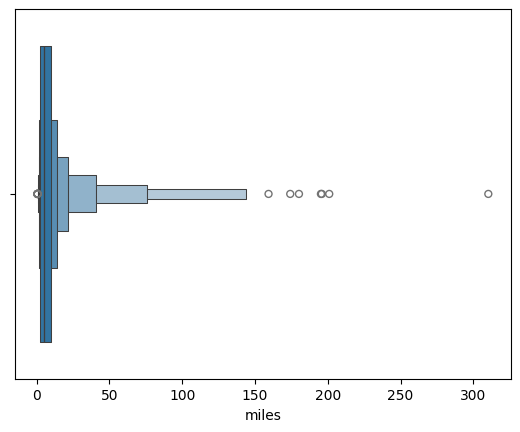

In [990]:
sns.boxenplot(x=df['miles'] )

In [991]:
q1= df['miles'].quantile(0.25)
q3=df['miles'].quantile(0.75)


In [992]:
IQR=q3-q1

In [993]:
ub= q3+IQR*1.5
ub

20.85

In [994]:
print(ub, (df['miles'] > ub).sum())

20.85 60


In [995]:
df[df['miles']>ub].head(10)

,start_date,end_date,category,start,stop,miles,purpose,route,month,duration,week name,month number,hours,time of day
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce ➝ West Palm Beach,January,0 days 22:53:00,Wednesday,1,14,Afternoon
25,2016-01-14 16:29:00,2016-01-14 17:05:00,Business,Houston,Houston,21.9,Customer Visit,Houston ➝ Houston,January,0 days 23:24:00,Thursday,1,16,Afternoon
36,2016-01-20 13:25:00,2016-01-20 14:19:00,Business,Raleigh,Cary,40.2,Customer Visit,Raleigh ➝ Cary,January,0 days 23:06:00,Wednesday,1,13,Afternoon
62,2016-02-01 12:10:00,2016-02-01 12:43:00,Business,Chapel Hill,Cary,23.3,Customer Visit,Chapel Hill ➝ Cary,February,0 days 23:27:00,Monday,2,12,Afternoon
119,2016-02-17 15:33:00,2016-02-17 16:17:00,Business,Colombo,Katunayaka,21.4,Temporary Site,Colombo ➝ Katunayaka,February,0 days 23:16:00,Wednesday,2,15,Afternoon
140,2016-02-20 14:50:00,2016-02-20 15:54:00,Business,R?walpindi,R?walpindi,23.1,Meeting,R?walpindi ➝ R?walpindi,February,0 days 22:56:00,Saturday,2,14,Afternoon
232,2016-03-17 12:52:00,2016-03-17 15:11:00,Business,Austin,Katy,136.0,Customer Visit,Austin ➝ Katy,March,0 days 21:41:00,Thursday,3,12,Afternoon
233,2016-03-17 15:16:00,2016-03-17 15:58:00,Business,Katy,Houston,30.2,Meeting,Katy ➝ Houston,March,0 days 23:18:00,Thursday,3,15,Afternoon
245,2016-03-19 14:01:00,2016-03-19 14:57:00,Business,Sugar Land,Houston,35.1,Customer Visit,Sugar Land ➝ Houston,March,0 days 23:04:00,Saturday,3,14,Afternoon
246,2016-03-19 15:34:00,2016-03-19 16:38:00,Business,Houston,Galveston,36.5,Meal/Entertain,Houston ➝ Galveston,March,0 days 22:56:00,Saturday,3,15,Afternoon


In [998]:
df.to_csv('uber.trip_.ata_cleaned.csv', index=False)
## saved